<a href="https://colab.research.google.com/github/JSEFERINO/JHSERIES2/blob/main/09_Series_Tiempo_Cap7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Introductorio Series de Tiempo por Julio Hurtado Márquez**
## **Text: Time Series Forecasting in Python - MARCO PEIXEIRO**
# **Parte 2. Pronósticos con modelos estadísticos**

# **7. Predicción de series temporales no estacionarias**
### **Este capítulo cubre**
+ Examinando el modelo de media móvil integrada autorregresiva, o $ARIMA( p , d , q )$
+ Aplicar el procedimiento general de modelado para series temporales no estacionarias.
+ Predicción utilizando el modelo $ARIMA( p , d , q )$

## **Introducción**
+ En los capítulos 4, 5 y 6 cubrimos el *modelo de media móvil, $MA( q )$*; el *modelo autorregresivo, $AR( p )$*; y el *modelo $ARMA, ARMA( p , q )$*.
+ Vimos cómo estos modelos solo se pueden usar para series temporales estacionarias, lo que requirió aplicar transformaciones, principalmente diferenciación, y probar la estacionariedad mediante la prueba ADF.
+ En los ejemplos que cubrimos, los pronósticos de cada modelo arrojaron valores diferenciados, lo que requirió que revirtiéramos esta transformación para devolver los valores a la escala de los datos originales.
+ Ahora agregaremos otro componente al modelo $ARMA(p,q)$ para que podamos pronosticar series temporales no estacionarias.
+ **Este componente es el orden de integración**, que se denota por la variable $d$.
+ Esto nos lleva al modelo de media móvil integrada autorregresiva $ARIMA ( p , d , q )$.
+ ***Usando este modelo, podemos tener en cuenta series temporales no estacionarias y evitar los pasos de modelar sobre datos diferenciados y tener que transformar inversamente los pronósticos.***

+ En este capítulo, definimos el modelo $ARIMA(p,d,q)$ y el orden de integración $d$.
+ Luego, agregamos un paso a nuestro procedimiento de modelado general.
+ En la figura 7.1, podemos ver el procedimiento general de modelado tal como se define en el capítulo 6.
+ Ahora, debemos agregar un paso para determinar el orden de integración para usarlo en el modelo $ARIMA(p,d,q)$.

+ **Figura 7.1 Procedimiento general de modelado utilizando un modelo ARMA( p , q ) . En este capítulo, agregaremos otro paso a este procedimiento para acomodar el modelo$ARIMA(p,d,q)$**.

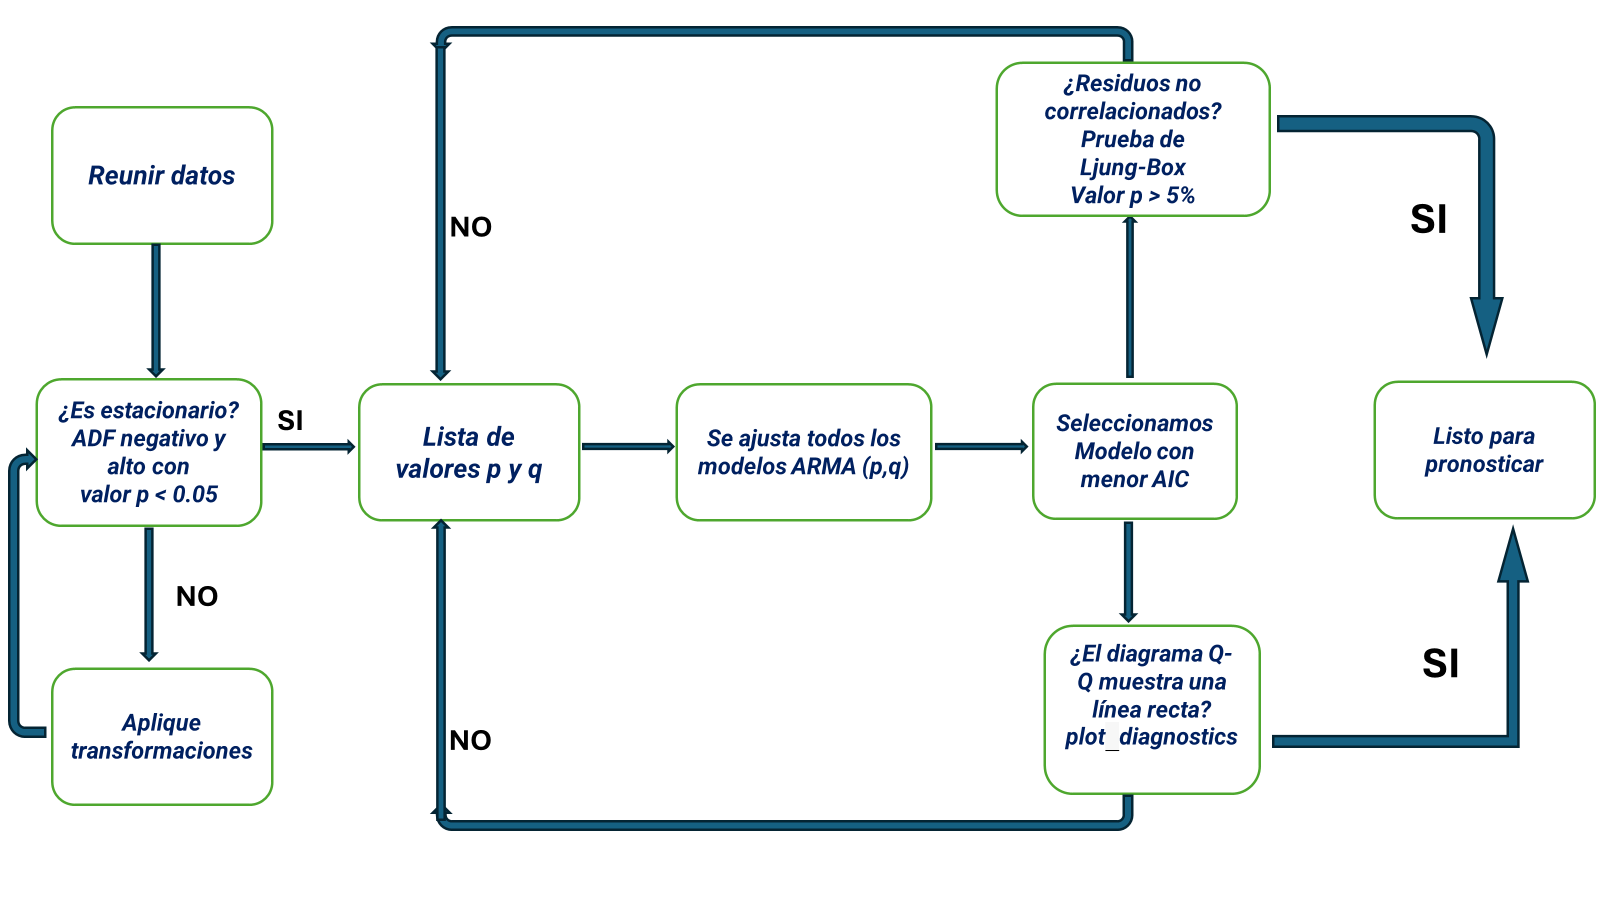

+ Luego, aplicamos nuestro procedimiento modificado para pronosticar una serie de tiempo no estacionaria, lo que significa que la serie tiene una tendencia o su varianza no es constante en el tiempo.

## **Ejemplo ilustrativo para el modelo ARIMA**
+ ***Específicamente, revisamos el conjunto de datos de las ganancias por acción (BPA) trimestrales de Johnson & Johnson entre 1960 y 1980 que estudiamos por primera vez en los capítulos 1 y 2. La serie se muestra en la figura 7.2. Aplicamos el modelo ARIMA(p,d,q) para pronosticar las EPS trimestrales para el año siguiente.***

***Figura 7.2 Ganancias por acción (BPA) trimestrales de Johnson & Johnson de 1960 a 1980. Trabajamos con el mismo conjunto de datos en los capítulos 1 y 2.***

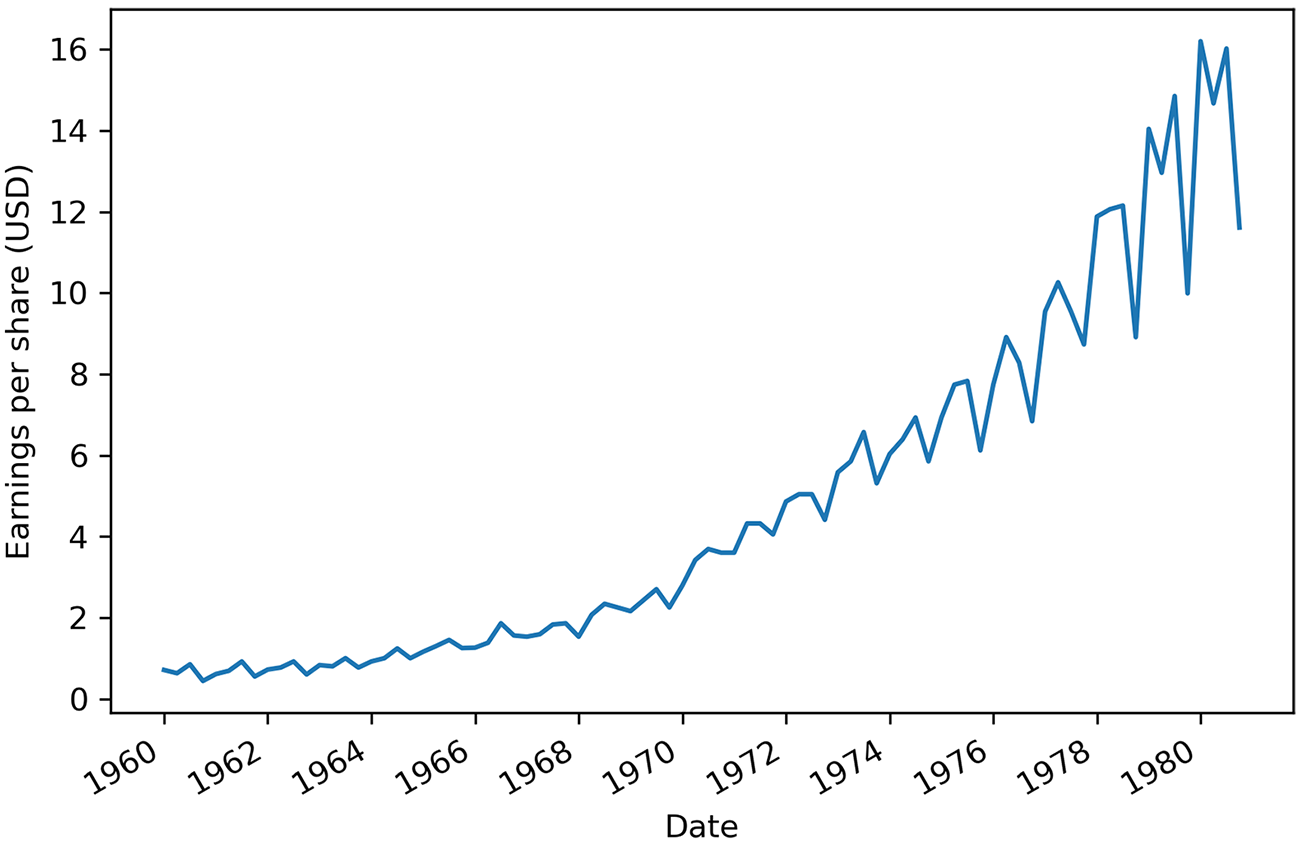

# **7.1. Definición del modelo de media móvil integrada autorregresiva**
+ **Un proceso autorregresivo de media móvil integrada es la combinación de un proceso autorregresivo AR(p), la integración I(d) y el proceso de media móvil MA(q)**.

+ Al igual que el proceso *ARMA*, el proceso *ARIMA* establece que el valor presente depende de los valores pasados, provenientes de la porción *AR(p)*, y de los errores pasados, provenientes de la porción *MA(q)*.
+ Sin embargo, en lugar de utilizar la serie original, denominada $y_t$ , el proceso ARIMA utiliza la serie diferenciada denominada $y'_t$ .
+ Tenga en cuenta que $y'_t$ puede representar una serie que se diferenció más de una vez.

+ Por lo tanto, la expresión matemática del *proceso ARIMA(p,d,q)* define que el valor presente de la serie diferenciada $y'_t$ es igual a la suma de una constante $C$ , valores pasados ​​de la serie diferenciada $φ_p*y'_{t-p}$, la media de la serie diferenciada $µ$ , los términos de error pasados $​​θ_q*ε_{t-q}$ y un término de error actual $ε_t$, como se muestra en la ecuación 7.1.

+ **Ecuación 7.1 - Modelo ARIMA(p,d,q)**
$$y'_t = C + φ_1*y'_{t –1} + ⋅⋅⋅+ φ_p*y'_{t – p} + θ_1*ϵ'_{t –1} + ⋅⋅⋅ + θq*ϵ'_{t – q} + ϵ_t$$

+ Al igual que en el *proceso ARMA*, el orden *p* determina cuántos valores rezagados de la serie se incluyen en el modelo, mientras que el orden *q* determina cuántos términos de error rezagados se incluyen en el modelo.
+ Sin embargo, al observar la ecuación 7.1, notamos que no se muestra explícitamente el orden *d*.

+ Aquí, el orden *d* se define como el *orden de integración*.
+ La integración es simplemente lo contrario de la diferenciación.
+ Por ello, a partir de ahora utilizaremos el término integración en lugar de indiferencia.
+ El orden de integración es entonces igual al número de veces que se diferencia una serie para volverse estacionaria.

+ Si diferenciamos una serie una vez y se vuelve estacionaria, entonces *d = 1* .
+ Si una serie se diferencia dos veces para volverse estacionaria, entonces *d = 2*.

### **Serie integrada**
+ **Una serie temporal que puede volverse estacionaria aplicando diferenciación se dice que es una serie integrada.**
+ En presencia de una serie temporal integrada no estacionaria, podemos utilizar el modelo **ARIMA(p,d,q)** para producir pronósticos.
+ Así, en términos simples, **el modelo ARIMA es simplemente un modelo ARMA que se puede aplicar a series temporales no estacionarias.**
+ Mientras que el modelo **ARMA(p,q)** requiere que la serie sea estacionaria antes de ajustar un modelo ARMA(p,q), el **modelo ARIMA(p,d,q)** se puede utilizar en series no estacionarias.
+ Simplemente debemos encontrar el orden de integración ***d***, que corresponde al número mínimo de veces que se debe diferenciar una serie para volverse estacionaria.



# **7.2. Modificación del procedimiento general de modelado para tener en cuenta series no estacionarias**
+ En el capítulo 6 construimos un procedimiento de modelado general que nos permitió modelar series de tiempo más complejas, lo que significa que la serie tiene un componente autorregresivo y un componente de promedio móvil.
+ Este procedimiento implica ajustar muchos modelos ARMA(p,q) y seleccionar el que tenga el AIC más bajo.
+ Luego, debemos estudiar los residuos del modelo para comprobar que se parecen al ruido blanco.
+ Si ese es el caso, entonces el modelo se puede utilizar para realizar pronósticos.
+ Podemos visualizar el procedimiento general de modelado en su estado actual en la figura 7.3.


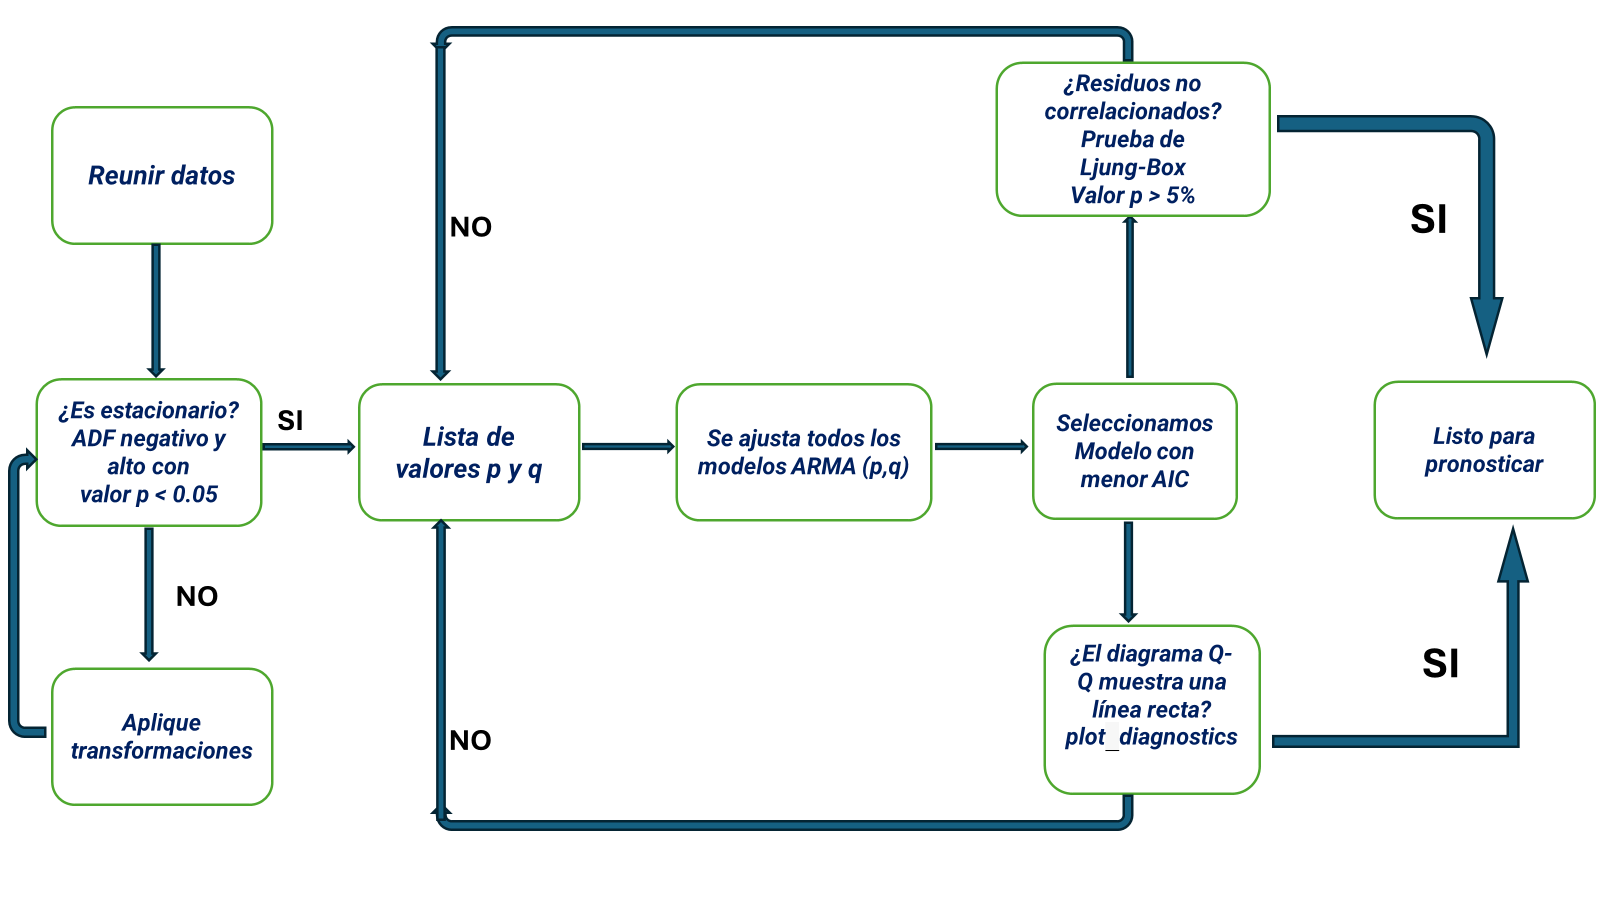


+ **Figura 7.3 Procedimiento general de modelado utilizando un modelo ARMA(p,q). Ahora debemos adaptarlo para aplicarlo a un modelo ARIMA(p,d,q) , permitiéndonos trabajar con series de tiempo no estacionarias.**

### **Mas de ARIMA**
+ La siguiente iteración del procedimiento de modelado general incluirá un paso para determinar el orden de integración $d$ .
+ De esta forma podemos aplicar el mismo procedimiento pero usando un modelo $ARIMA(p,d,q)$, que nos permite pronosticar series de tiempo no estacionarias.

+ De la sección anterior sabemos que el orden de integración $d$ es simplemente el número mínimo de veces que se diferencia una serie para volverse estacionaria.
+ Por lo tanto, si una serie es estacionaria después de diferenciarla una vez, entonces $d=1$ .
+ Si es estacionario después de diferenciarlo dos veces, entonces $d=2$.
+ Por lo tanto, agregamos un paso tal que cuando se aplican transformaciones a la serie, establecemos el valor de $d$ en el número de veces que se diferencia la serie.
+ Luego, en lugar de ajustar muchos modelos $ARMA(p,q)$, ajustamos muchos modelos $ARIMA(p,d,q)$.
+ El resto del procedimiento sigue siendo el mismo, ya que seguimos utilizando el AIC para seleccionar el mejor modelo y estudiar sus residuos.
+ *Tenga en cuenta que en el caso de que $d=0$, entonces es equivalente a un modelo ARMA(p,q). Esto también significa que no era necesario diferenciar la serie para ser estacionaria*.
+ El procedimiento resultante se muestra en la figura 7.4.

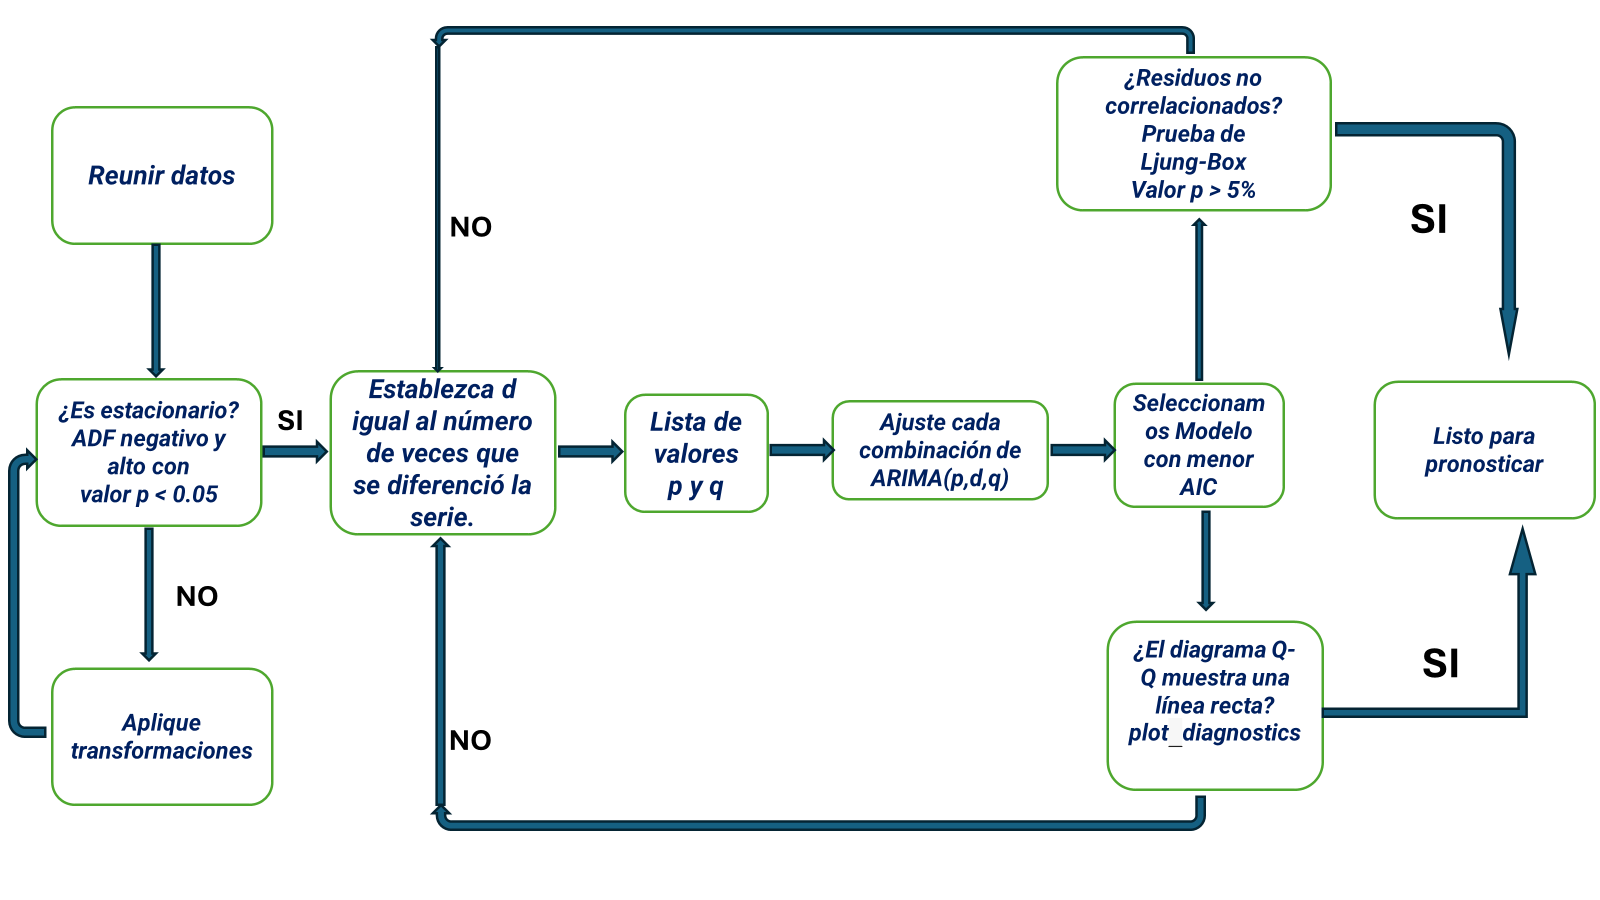

+ **Figura 7.4 Procedimiento de modelado general para utilizar el modelo $ARIMA(p,d,q)$. Observe la adición de un paso donde especificamos el parámetro d para el modelo $ARIMA(p,d,q)$. Aquí, d es simplemente el número mínimo de veces que se debe diferenciar una serie para volverse estacionaria.**




# **7.3. Pronóstico de una serie temporal no estacionaria**
+ Ahora vamos a aplicar el procedimiento de modelado general que se muestra en la figura 7.4 para pronosticar las ganancias por acción (EPS) trimestrales de Johnson & Johnson.
+ Usaremos el mismo conjunto de datos que se presentó en los capítulos 1 y 2.
+ **Pronosticaremos las ganancias por acción trimestrales de un año, lo que significa que debemos pronosticar cuatro pasos de tiempo en el futuro, ya que hay cuatro trimestres en un año. El conjunto de datos cubre el período entre 1960 y 1980. Como siempre, el primer paso es recopilar nuestros datos. Aquí lo hacen por nosotros, por lo que simplemente podemos cargarlos y mostrar la serie. El resultado se muestra en la figura 7.5.**

### **7.3.1. Realice el paso a paso con nuestro ejemplo Ilustrativo**
+ **Paso 1. Las librerias de necesarias**
+ **Paso 2. Importar los datos**
+ **Paso 3. Dibuje el proceso estudiado ARMA(p,q).**
+ **Paso 4. Ejecute la prueba ADF y verifique si el proceso original es estacionario. Si no lo es, aplique la diferenciación.**
+ **Paso 5. Ejecute la prueba ADF y verifique si el proceso diefenciado es estacionario. Si no lo es, aplique vuelva a diferenciar.**
+ **Paso 6. Dibuje la serie diferenciada ultima estacionaria.**
+ **Paso 7. Dibuje el ACF. Y concluya apropiadamente segun el grafico muestre**
+ **Paso 8. Dibuje el PACF. Y concluya apropiadamente segun el grafico muestre**
+ **Paso 9. Hemos confirmado que nuestro proceso es un ARMA(p,q). Separe la serie simulada en conjuntos de prueba y de entrenamiento de acuerdo al contexto del problema**
+ **Paso 10. Gráfica de las regiones de entrenamiento y de prueba del Modelo ARMA(p,q) para la serie original y la serie diferenciada**
+ **Paso 11. Ajustamos todos los modelos ARMA y calculamos el AIC**
+ **Paso 12. Los residuos se comportan como un ruido blanco - ¿El diagrama Q-Q muestra una línea recta?  - método plot_diagnostics**.
+ **Paso 13. Realice la Prueba de independencia de los residuos- prueba de Ljung-Box y analice los resultados obtenidos**
+ **Paso 14. Verifique si se cumplen todos los pasos previos y si estamos listo para pronosticar**
+ **Paso 15. Haga pronósticos sobre el conjunto de prueba. Utilice el método de la media histórica, el método del último valor conocido y un modelo ARMA(2,2). Utilice la función rolling_forecast y utilice una longitud de ventana adecuada.**
+ **Paso 16. Halle los pronosticos con los tres métodos empleados adecuadamente.**
+ **Paso 17. Dibuje los prosticos con los tres métodos empleados en la serie diferenciada**
+ **Paso 18. Mida el MSE e identifique su modelo campeón.**
+ **Paso 19. Dibuje sus MSE en un gráfico de barras.**
+ **Paso 20. Revertir la Transformación del pronóstico**
+ **Pas0 21. Obtenga el Error absoluto medio (MAE) e interpretelo**

#### **Paso 1. Las librerias de necesarias**

In [ ]:
#### **Paso 1. Las librerias de necesarias**
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import sklearn.metrics

In [ ]:
# hacer que los graficos se vean bonitos
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
# Ignorar advertencias innecesarias
import warnings
warnings.filterwarnings('ignore')

## **Paso 2. Importando los datos**

In [ ]:
## **Paso 2. Importando los datos**
import pandas as pd

df = pd.read_csv('/content/jj.csv')

df.head() # Muestra las primeras cinco filas de datos.


,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [ ]:
print(len(df))

84


###**Paso 3. Dibuje el proceso estudiado ARMA(p,q).**

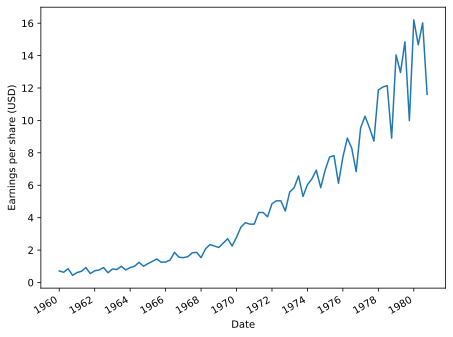

In [ ]:
#**Paso 3. Dibuje el proceso estudiado ARMA(p,q).**
fig, ax = plt.subplots()
ax.plot(df.date, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972,1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()

+ **Figura 7.5 Ganancias por acción (BPA) trimestrales de Johnson & Johnson entre 1960 y 1980**
+ Siguiendo nuestro procedimiento, debemos comprobar si los datos son estacionarios.
+ La Figura 7.5 muestra una tendencia positiva, ya que el BPA trimestral tiende a aumentar con el tiempo.
+ No obstante, podemos aplicar la prueba de Dickey-Fuller aumentada (ADF) para determinar si es estacionario o no.
+ A estas alturas ya deberías estar muy familiarizado con estos pasos, por lo que irán acompañados de comentarios mínimos.

####**Paso 4. Ejecute la prueba ADF y verifique si el proceso es estacionario. Si no lo es, aplique la diferenciación.**

In [ ]:
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [ ]:
### **Prueba de estacionariedad**
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(df.data)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF = {ADF_result[0]} es negativo y')
print(f'Si valor p ={ADF_result[1]} es menor a 0.05')

ADF Statistic: 2.7420165734574744
p-value: 1.0
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF = 2.7420165734574744 es negativo y
Si valor p =1.0 es menor a 0.05


## **Acerca del Paso 4**
+ Este bloque de código devuelve una estadística ADF de 2,74 con un valor p de 1,0.
+ Dado que la estadística ADF no es un número negativo grande y el valor p es mayor que 0,05, no podemos rechazar la hipótesis nula, lo que significa que nuestra serie no es estacionaria.
+ Necesitamos determinar cuántas veces se debe diferenciar la serie para que se vuelva estacionaria. Esto establecerá el orden de integración d.
+ Podemos aplicar una diferenciación de primer orden y comprobar la estacionariedad.

#### **Paso 5. Ejecute la prueba ADF y verifique si el proceso diefenciado es estacionario. Si no lo es, aplique vuelva a diferenciar.**

#### **Diferenciación de primer orden $d=1$**

In [ ]:
### **Nuestra nueva serie a estudiar sera la diferenciada**
eps_diff = np.diff(df.data, n=1)

In [ ]:
### **Prueba de estacionariedad para la serie diferenciada**
from statsmodels.tsa.stattools import adfuller
ADF_diff = adfuller(eps_diff)

print(f'ADF Statistic: {ADF_diff[0]}')
print(f'p-value: {ADF_diff[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF = {ADF_diff[0]} es negativo y')
print(f'Si valor p ={ADF_diff[1]} es menor a 0.05')

ADF Statistic: -0.40740976363804615
p-value: 0.9088542416911305
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF = -0.40740976363804615 es negativo y
Si valor p =0.9088542416911305 es menor a 0.05


### **Acerca del Paso 5 y la Diferenciación de primer orden $d=1$****
+ Esto da como resultado una estadística ADF de -0,41 y un valor p de 0,9. Nuevamente, la estadística ADF no es un número negativo grande y el valor p es mayor que 0,05.
+ Por tanto, no podemos rechazar la hipótesis nula y debemos concluir que después de una diferenciación de primer orden, la serie no es estacionaria.

+ **Ahora intentemos diferenciar nuevamente para ver si la serie se vuelve estacionaria.**


#### **Diferenciación de segundo orden $d=2$**

In [ ]:
### **Nuestra nueva serie a estudiar sera la diferenciada**
eps_diff2 = np.diff(df.data, n = 2)

In [ ]:
### **Prueba de estacionariedad para la serie diferenciada**
from statsmodels.tsa.stattools import adfuller
ADF_diff2 = adfuller(eps_diff2)

print(f'ADF Statistic: {ADF_diff2[0]}')
print(f'p-value: {ADF_diff2[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF = {ADF_diff2[0]} es negativo y')
print(f'Si valor p ={ADF_diff2[1]} es menor a 0.05')

ADF Statistic: -3.585162874793155
p-value: 0.006051099869603682
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF = -3.585162874793155 es negativo y
Si valor p =0.006051099869603682 es menor a 0.05


### **Acerca del Paso 5 y la Diferenciación de segundo orden $d=2$**
+ Esto da como resultado un estadístico ADF de -3,59 y un valor p de 0,006.
+ Ahora que tenemos un valor p menor que 0,05 y un estadístico ADF negativo grande, podemos rechazar la hipótesis nula y concluir que nuestra serie es estacionaria.
+ Fueron necesarias dos rondas de diferenciación para que nuestros datos fueran estacionarios, lo que significa que nuestro orden de integración es 2,
por lo que $d = 2$.
+ Antes de pasar a ajustar diferentes combinaciones de modelos ARIMA(p,d,q), debemos separar nuestros datos en conjuntos de prueba y de entrenamiento.
+ Reservaremos el último año de datos para realizar pruebas.
+ Esto significa que ajustaremos el modelo con datos de 1960 a 1979 y predeciremos las ganancias por acción trimestrales en 1980 para evaluar la calidad de nuestro modelo en comparación con los valores observados en 1980.
+ En la figura 7.6, el período de prueba es el área sombreada.

#### **Paso 6. Dibuje la serie diferenciada ultima estacionaria.**

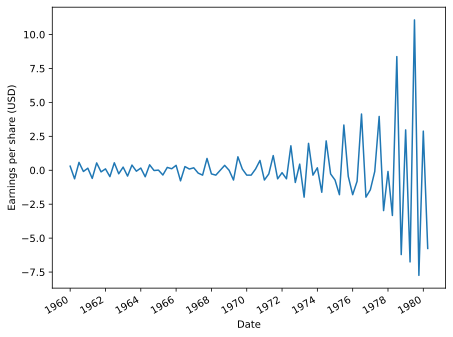

In [ ]:
#### **Paso 6. Dibuje la serie diferenciada ultima estacionaria.**
fig, ax = plt.subplots()
ax.plot(eps_diff2)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972,1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()

#### **Paso 7. Dibuje el ACF. Y concluya apropiadamente segun el grafico muestre**

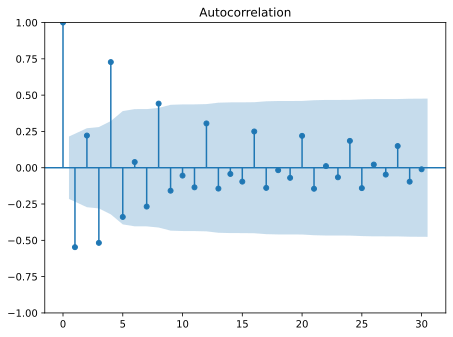

In [ ]:
# **Paso 7. Dibuje el ACF. Y concluya apropiadamente segun el grafico muestre**
sm.graphics.tsa.plot_acf(eps_diff, lags = 30)
plt.tight_layout()

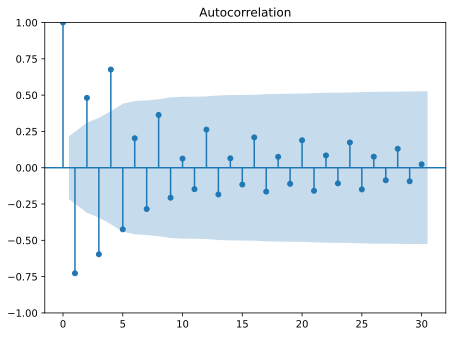

In [ ]:
# **Paso 7. Dibuje el ACF. Y concluya apropiadamente segun el grafico muestre**
sm.graphics.tsa.plot_acf(eps_diff2, lags = 30)
plt.tight_layout()

#### **Conclusión acerca del ACF**
+ **Podemos ver una alta correlación después del retraso 0, por lo que el proceso no es un paseo aleatorio**.

#### **Paso 8. Dibuje el PACF. Y concluya apropiadamente segun el grafico muestre**

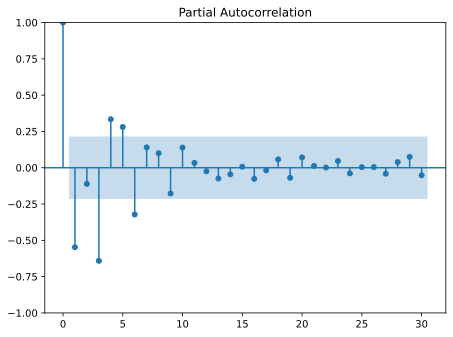

In [ ]:
#### **Paso 8. Dibuje el PACF. Y concluya apropiadamente segun el grafico muestre**

sm.graphics.tsa.plot_pacf(eps_diff, lags = 30)
plt.tight_layout()

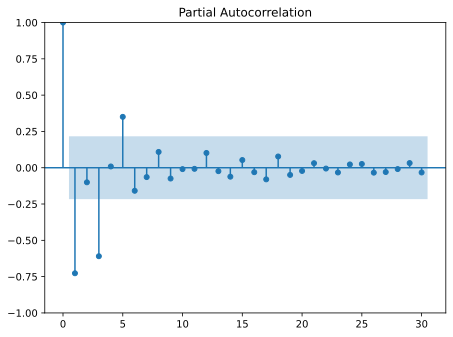

In [ ]:
#### **Paso 8. Dibuje el PACF. Y concluya apropiadamente segun el grafico muestre**

sm.graphics.tsa.plot_pacf(eps_diff2, lags = 30)
plt.tight_layout()

#### **Conclusiones del grafico - PACF**
+ Como era de esperar, no podemos obtener el orden de AR a partir de este gráfico debido a su naturaleza sinusoidal.
+ Tendremos que usar el nuevo método que usamos con nuestra simulación anterior.
+ Bien, volvamos a lo que dicen los libros. Grafiquemos la serie diferencial y la normal una al lado de la otra.

### **Paso 9. Hemos confirmado que nuestro proceso es un ARIMA(p,d,q).**
+ Tenga en cuenta que no proporcionamos un rango de valores para el parámetro *d* porque tiene una definición muy específica: es la cantidad de veces que se debe diferenciar una serie para que se vuelva estacionaria.
+ Por lo tanto, se debe establecer en un valor específico, que en este caso es 2.
+ Además, *d* debe ser constante para poder comparar modelos utilizando el AIC.
+ Variar *d* cambiaría la función de verosimilitud utilizada en el cálculo del *valor AIC*, por lo que comparar modelos utilizando el AIC como criterio ya no sería válido.
+ Ahora podemos ejecutar la función optimized_ARIMA utilizando el conjunto de entrenamiento.
+ La función devuelve un DataFrame con el modelo que tiene el AIC más bajo en la parte superior.

In [ ]:
### **Separación en conjunto de Prueba y de entrenamiento para la serie original**

train = df[:-4]
test = df[-4:]
print('Tamaños')
print(f'Conjunto de entrenamiento {len(train)}')
print(f'Conjunto de Prueba {len(test)}')
print('En porcentajes')
print(f'Conjunto de entrenamiento {round(len(train)/len(df)*100,1)}')
print(f'Conjunto de Prueba {round(len(test)/len(df)*100,1)}')

Tamaños
Conjunto de entrenamiento 80
Conjunto de Prueba 4
En porcentajes
Conjunto de entrenamiento 95.2
Conjunto de Prueba 4.8


### **Paso 10. Gráfica de las regiones de entrenamiento y de prueba del Modelo ARIMA(p,q) para la serie original y la serie diferenciada**
+ Podemos imprimir la longitud del tren y de los conjuntos de prueba como comprobación de la coherencia y, efectivamente, el conjunto de prueba tiene 168 puntos de datos y el conjunto de tren tiene 9.831 puntos de datos.
+ Ahora visualicemos nuestro conjunto de tren y nuestro conjunto de prueba tanto para la serie diferenciada como para la original.
+ **El gráfico resultante se muestra en la figura 6.16.**

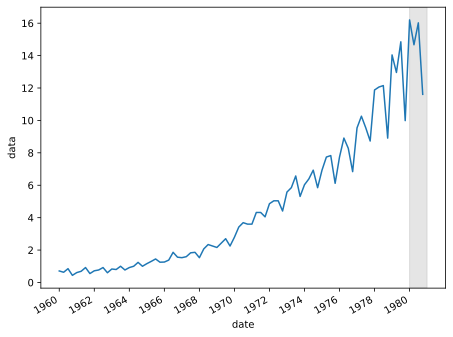

In [ ]:
### **Paso 10. Gráfica de las regiones de entrenamiento y de prueba del Modelo ARMA(p,q)**
fig, ax = plt.subplots()

ax.plot(df.data)
ax.set_xlabel('date')
ax.set_ylabel('data')
ax.axvspan(80, 84, color='#808080', alpha=0.2)


plt.xticks(
    np.arange(0, 81, 8),
    [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
)

fig.autofmt_xdate()
plt.tight_layout()

### **Paso 11. Ajustamos todos los modelos ARIMA y calculamos el AIC**
+ Para ajustar los distintos modelos ARIMA(p,d,q), definiremos la función optimizar_ARIMA.
+ Es casi idéntica a la función optimizar_ARMA que definimos en el capítulo 6, solo que esta vez agregaremos el orden de integración d como entrada a la función.
+ El resto de la función permanece igual, ya que ajustamos los diferentes modelos y los ordenamos por AIC ascendente para seleccionar el modelo con el AIC más bajo.
+ La función optimizar_ARIMA se muestra en la siguiente lista.

###**Listado 7.1 Función para ajustar todos los modelos ARIMA(p,d,q) únicos**
+ La función toma como entradas los datos de la serie temporal, la lista de combinaciones únicas (p,q) y el orden de integración d.

In [ ]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_arima(
        endog: pd.Series | list, order_l: list, d: int) -> pd.DataFrame:
    '''
    Dada una lista de combinaciones de p,q, pruebe diferentes combinaciones de órdenes arma
     y compárelas entre sí utilizando el criterio de información de Akaike.

:param endogcoding.Union[pd.Series, list]: el proceso de serie temporal observado
:param order_l list: lista de todas las combinaciones de p y q

:returns: marco de datos con dos columnas, una con la combinación de p y q,
la otra con la puntuación AIC; el marco de datos ya está ordenado.
:rtype: pd.DataFrame
    '''

    results = []

    for order in order_l:
        try:
            model = sm.tsa.statespace.SARIMAX(
                endog,
                order = (order[0], d, order[1]),
                simple_differencing = False,
            )
            model = model.fit(disp = False)
        except:
            continue

        aic = model.aic
        results.append([order, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    # sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by = 'AIC', ascending = True)
    result_df = result_df.reset_index(drop = True)

    return result_df

### **$ARIMA(p,d,q)$**
+ Con la función en funcionamiento, podemos definir una lista de valores posibles para los órdenes p y q. + En este caso, probaremos los valores 0, 1, 2 y 3 para ambos órdenes y generaremos la lista de combinaciones únicas (p,q).

In [ ]:
### **Paso 11. Ajustamos todos los modelos ARMA y calculamos el AIC**
# Crea una lista para nuestros posibles valores de p y q.
ps = range(0, 4)
qs = range(0, 4)
d = 2

In [ ]:
# Lista de todas las combinaciones únicas de las listas anteriores.
order_l = list(itertools.product(ps, qs))
order_l

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [ ]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


+ **Dado que predeciremos 1980, entrenaremos solo con todos los datos hasta 1979, lo que significa que necesitamos crear el conjunto de entrenamiento.**

In [ ]:
train = df.data[:-4]
train.tail()

75     8.91
76    14.04
77    12.96
78    14.85
79     9.99
Name: data, dtype: float64

In [ ]:
# Calculos de (p,q) y el AIC correpondiente al modelo ARMA(p,q)
result_df = optimize_arima(train, order_l, d)
result_df

,"(p,q)",AIC
0,"(3, 3)",115.266637
1,"(3, 1)",115.624980
2,"(3, 2)",115.672007
3,"(3, 0)",154.430625
4,"(0, 3)",194.654716
5,"(0, 2)",209.274868
6,"(2, 3)",220.666965
7,"(1, 3)",228.267730
8,"(1, 2)",228.935782
9,"(2, 2)",229.974691


#### **Conclusiones del Paso 11. Ajustamos todos los modelos ARIMA y calculamos el AIC**
+ **El DataFrame devuelto muestra que un valor de 3 tanto para p como para q da como resultado el AIC más bajo.**
+ **Por lo tanto, un modelo ARIMA(3,2,3) parece ser el más adecuado para esta situación.**
+ Ahora, evaluemos la validez del modelo estudiando sus residuos.


## **Paso 12. Los residuos se comportan como un ruido blanco - ¿El diagrama Q-Q muestra una línea recta?  - método plot_diagnostics**

In [ ]:
# **Paso 12. Los residuos se comportan como un ruido blanco**
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = sm.tsa.statespace.SARIMAX(
    train,
    order = (3, 2, 3),
    simple_differencing = False,
)
model = model.fit(disp = False)
residuals = model.resid

### **Los residuos son un ruido blanco**
+ Para ello, ajustaremos un modelo ARIMA(3,2,3) al conjunto de entrenamiento y mostraremos los diagnósticos de los residuos utilizando el método plot_diagnostics.
+ **El resultado se muestra en la figura 7.7.**

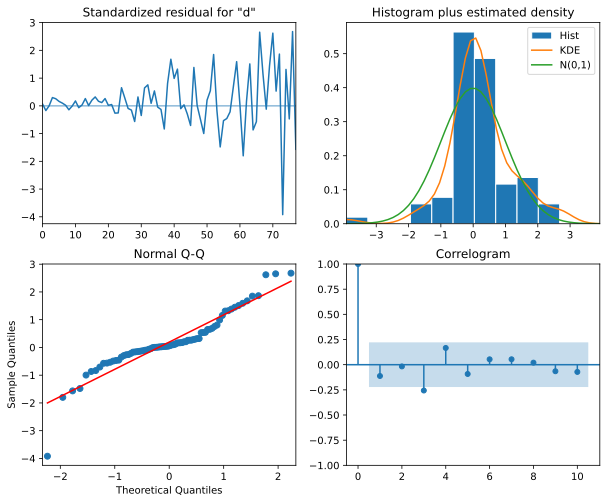

In [ ]:
# **Los residuos son un ruido blanco**
model.plot_diagnostics(figsize=(10, 8));

#### **Conclusiones acerca del Paso 12**
+ **En la figura 7.7, el gráfico superior izquierdo muestra los residuos a lo largo del tiempo. Si bien no hay tendencia en los residuos, la varianza no parece ser constante, lo que es una discrepancia en comparación con el ruido blanco.
+ En la parte superior derecha se encuentra la distribución de los residuos.
+ Podemos ver que está bastante cerca de una distribución normal.
+ El gráfico Q-Q nos lleva a la misma conclusión, ya que muestra una línea que es bastante recta, lo que significa que la distribución de los residuos está cerca de una distribución normal.
+ Finalmente, al observar el correlograma en la parte inferior derecha, podemos ver que un coeficiente parece ser significativo en el retardo 3.
+ Sin embargo, dado que no está precedido por ningún coeficiente de autocorrelación significativo, podemos asumir que esto se debe al azar.
+ Por lo tanto, podemos decir que el correlograma no muestra coeficientes significativos después del retardo 0, al igual que el ruido blanco.
+ Por lo tanto, **desde un punto de vista cualitativo, parece que nuestros residuos están cerca del ruido blanco**, lo que es una buena señal, ya que significa que los errores del modelo son aleatorios.

### **Paso 13. Prueba de independencia de los residuos- prueba de Ljung-Box**
+ Nuestro último paso es ejecutar la prueba de **Ljung-Box** para determinar si los residuos están correlacionados.
+ Si los valores p devueltos superan 0,05, no podemos rechazar la hipótesis nula, lo que significa que nuestros residuos no están correlacionados y se distribuyen de forma independiente, al igual que el ruido blanco.
+ Aplicaremos la prueba en los primeros 10 rezagos y estudiaremos los valores p. Si todos los valores p son mayores que.

In [ ]:
# **Paso 13. Prueba de independencia de los residuos- prueba de Ljung-Box**
residuals = model.resid
sm.stats.acorr_ljungbox(residuals, lags = range(1, 11))

,lb_stat,lb_pvalue
1,1.652020,0.198684
2,1.654544,0.437241
3,7.276173,0.063597
4,9.231226,0.055573
5,9.853425,0.079497
6,10.097125,0.120621
7,10.346926,0.169751
8,10.379005,0.239426
9,10.721222,0.295303
10,11.159917,0.345196


#### **Análisis de la prueba Prueba de Ljung-Box**
+ *Al ejecutar la prueba de Ljung-Box en los primeros 10 rezagos de los residuos del modelo, se obtiene una lista de valores p que son todos mayores que 0,05.*
+ *Por lo tanto, no rechazamos la hipótesis nula, lo que significa que los residuos no están correlacionados, como el ruido blanco.*

+ Todo parece estar bastante bien, pero nuestro trabajo no ha terminado; necesitamos establecer una línea base con la que comparar nuestra predicción y, en realidad, necesitamos hacer la predicción con nuestro modelo arima(3,2,3).

### **Paso 14. Verificando si se cumplen todos los pasos previos y si estamos listo para pronosticar**

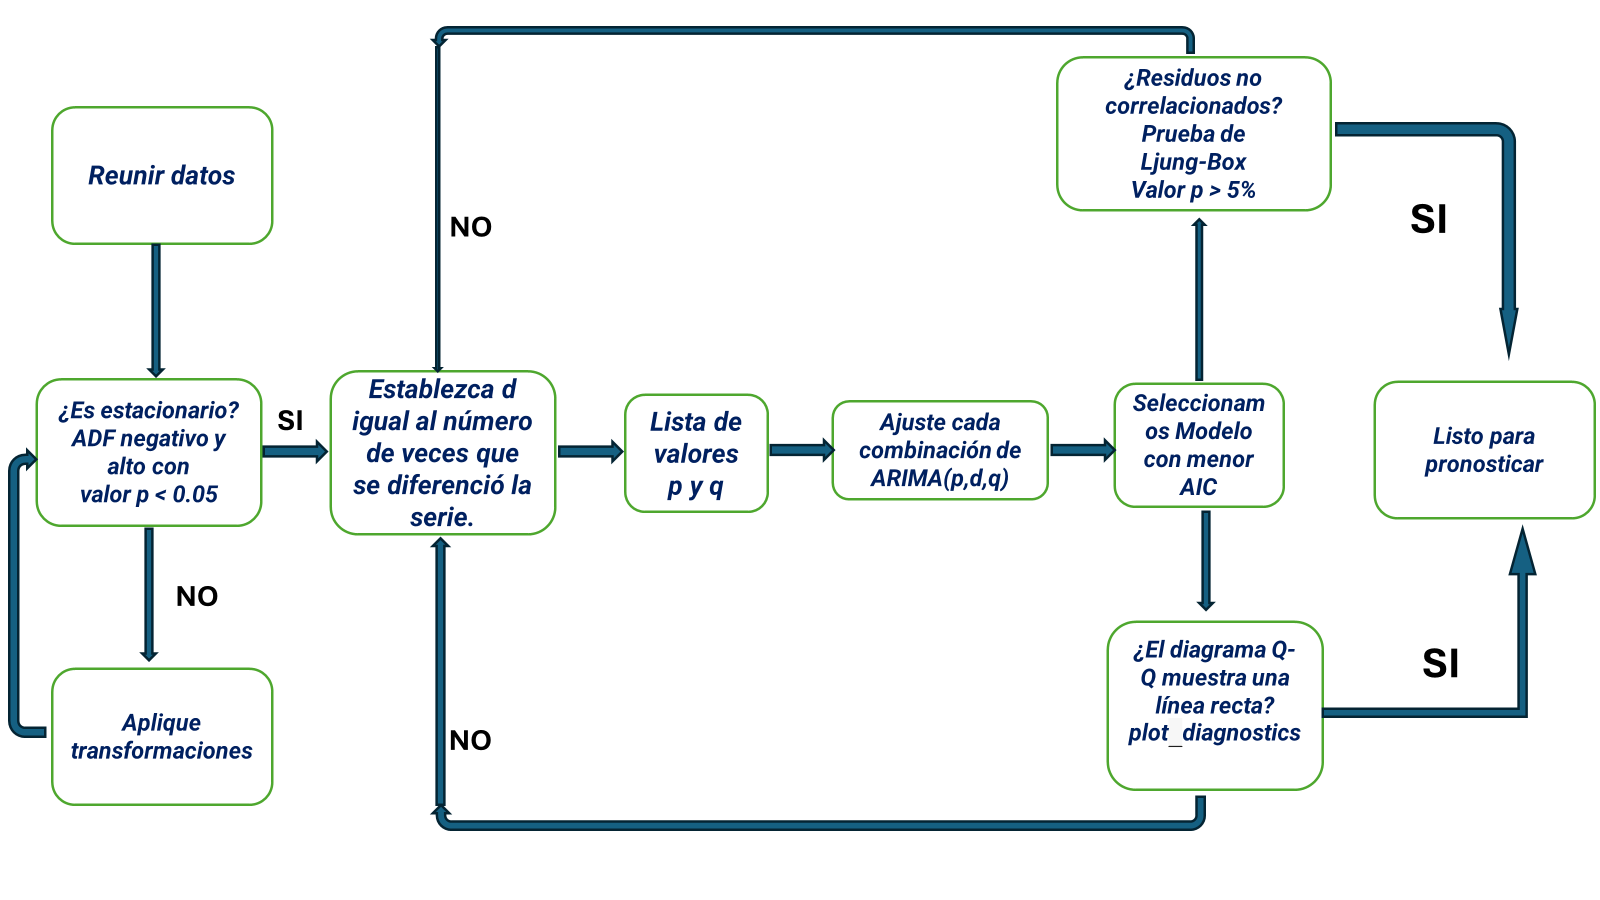

#### **Paso 15. Haga pronósticos sobre el conjunto de prueba. Utilice el método de la media histórica, el método del último valor conocido y un modelo ARIMA(3,2,3). Utilice la función `rolling_forecast` y utilice una longitud de ventana adecuada.**
+ Nuestro modelo ARIMA(3,2,3) ha pasado todas las comprobaciones y ahora puede utilizarse para realizar Pronosticos.
+ Recuerde que nuestro conjunto de pruebas son los últimos cuatro puntos de datos, correspondientes a las cuatro ganancias por acción trimestrales informadas en 1980.
+ **Como punto de referencia para nuestro modelo, utilizaremos el método estacional ingenuo.**
+ **Esto significa que tomaremos las ganancias por acción del primer trimestre de 1979 y las utilizaremos como previsión para las ganancias por acción del primer trimestre de 1980.**
+ A continuación, las ganancias por acción del segundo trimestre de 1979 se utilizarán como previsión para las ganancias por acción del segundo trimestre de 1980, y así sucesivamente.
+ Recuerde que necesitamos un punto de referencia, o un modelo de referencia, al realizar modelos para determinar si el modelo que desarrollamos es mejor que un método ingenuo.
+ El rendimiento de un modelo siempre debe evaluarse en relación con un modelo de referencia
+ El pronóstico estacional ingenuo se implementa seleccionando las ganancias por acción trimestrales informadas en 1979 y utilizando los mismos valores que un pronóstico para el año 1980.
+ No hay media histórica ni nada sofisticado aquí.

In [ ]:
test = df.iloc[-4:] # El conjunto de prueba corresponde a los últimos cuatro puntos de datos.

### **Pronóstico estacional ingenuo para comparar**
+ El pronóstico estacional ingenuo se implementa seleccionando el EPS trimestral informado en 1979 y utilizando los mismos valores como pronóstico para el año 1980.
+ Con nuestra línea base en su lugar, ahora podemos hacer pronósticos utilizando el modelo ARIMA(3,2,3) y almacenar los resultados en la columna ARIMA_pred

In [ ]:
test['naive_seasonal'] = df['data'].iloc[76:80].values

#### **Paso 16. Halle los pronosticos con los tres métodos empleados adecuadamente.**

### **Paso 17. Dibuje los prosticos con los tres métodos empleados en la serie diferenciada**

In [ ]:
arima_pred = model.get_prediction(80, 83).predicted_mean
test['arima_pred'] = arima_pred

In [ ]:
test

,date,data,naive_seasonal,arima_pred
80,1980-01-01,16.20,14.04,15.858693
81,1980-04-01,14.67,12.96,14.381508
82,1980-07-02,16.02,14.85,16.365509
83,1980-10-01,11.61,9.99,11.680906


### **Paso 18. Mida el MSE e identifique su modelo campeón.**
+ Ahora mediremos el error cuadrático medio (MSE) para evaluar el rendimiento de cada modelo.
+ El modelo con el MSE más bajo es el modelo con mejor rendimiento.

In [ ]:
# **Paso 18. Mida el MSE e identifique su modelo campeón.**
from sklearn.metrics import mean_squared_error

mse_naive_seasonal = mean_squared_error(test['naive_seasonal'], test['data'])
mse_ARIMA = mean_squared_error(test['arima_pred'], test['data'])


print('El MSE  con los diferentes metodos ingenuos y ARIMA(3,2,3)')
print(f'El Error MSE con la media historica es {round(mse_naive_seasonal,2)}')


print(f'El Error MSE con la ARIMA(3,2,3) es {round(mse_ARIMA,2)}')

El MSE  con los diferentes metodos ingenuos y ARIMA(3,2,3)
El Error MSE con la media historica es 2.9
El Error MSE con la ARIMA(3,2,3) es 0.08


#### **Paso 19. Dibuje sus MSE en un gráfico de barras.**

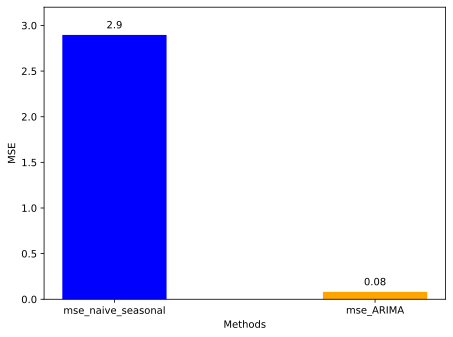

In [ ]:
## **Paso 19. Dibuje sus MSE en un gráfico de barras.**
import matplotlib.pyplot as plt

# Datos
x = ['mse_naive_seasonal', 'mse_ARIMA']
y = [mse_naive_seasonal, mse_ARIMA]

# Colores para las barras (puedes modificar esta lista según tus preferencias)
colors = ['blue',  'orange']

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar las barras con colores específicos
bars = ax.bar(x, y, width=0.4, color=colors)

# Etiquetas y límites del eje y
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 3.2)

# Añadir texto con los valores encima de cada barra
for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.05,
             round(value, 2),
             ha='center', va='bottom')

# Ajustar el diseño y guardar la figura
plt.tight_layout()
plt.savefig('figures.png', dpi=300)
plt.show()


#### **Conclusiones Acerca del MSE**

+ En la figura 7.9, puede ver que el MSE para el pronóstico estacional ingenuo es del 2.9, mientras que el MSE para el modelo ARIMA(3,2,3) es del 0.08, que es muy pequeño con respecto al valor de referencia.
+ Esto significa que el modelo ARIMA(3,2,3) es claramente un modelo mejor que el método estacional ingenuo.

## **Paso 20. Con ARIMA no es necesario Revertir la Transformación del pronóstico**
+ Como punto de referencia para nuestro modelo, utilizaremos el método estacional ingenuo.
+ Esto significa que tomaremos el BPA del primer trimestre de 1979 y lo utilizaremos como pronóstico para el BPA del primer trimestre de 1980.
+ Luego, el BPA del segundo trimestre de 1979 se utilizará como pronóstico para el BPA del segundo trimestre de 1980, y así sucesivamente.
+ Recuerde que necesitamos un punto de referencia, o un modelo de referencia, cuando modelamos para determinar si el modelo que desarrollamos es mejor que un método ingenuo.
+ El desempeño de un modelo siempre debe evaluarse en relación con un modelo de referencia

+ **Luego podemos trazar los pronósticos en la escala original de los datos**.

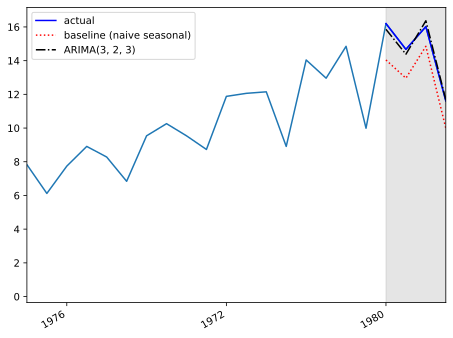

In [ ]:

fig, ax = plt.subplots()

ax.plot(df.date, df.data)
ax.plot(test.data, 'b', label = 'actual')
ax.plot(test.naive_seasonal, 'r:', label = 'baseline (naive seasonal)')
ax.plot(test.arima_pred, 'k-.', label = 'ARIMA(3, 2, 3)')

ax.legend(loc = 2)

ax.axvspan(80, 84, color='#808080', alpha = 0.2)

ax.set_xlim(62, 83)

plt.xticks(
    [64, 72, 80],
    ['1976', '1972', '1980'],
)

fig.autofmt_xdate()
plt.tight_layout()

+ **Figura 7.8 Previsiones de las ganancias por acción trimestrales de Johnson & Johnson en 1980. Podemos observar que las predicciones provenientes del modelo ARIMA(3,2,3), mostradas como una línea discontinua, se superponen casi perfectamente con los datos observados en 1980.**

## **Paso 21. Obtenga el Error absoluto medio (MAE) el MAPE**
+ Podemos medir el error absoluto medio (MAE) de las predicciones ARMA(2,2) indiferenciadas para entender qué tan lejos están las predicciones de los valores reales.
+ Usaremos el MAE simplemente porque es fácil de interpretar.

In [ ]:
## **Paso 21. Obtenga el Error absoluto medio (MAE)**
from sklearn.metrics import mean_absolute_error

mae_naive_seasonal = sklearn.metrics.mean_absolute_error(test.data, test.naive_seasonal)
mae_arima_pred = sklearn.metrics.mean_absolute_error(test.data, test.arima_pred)

print(f'MAE con método ingenuo = {mae_naive_seasonal}')
print(f'MAE con método ARIMA(3,2,3) = {mae_arima_pred} ')

MAE con método ingenuo = 1.6649999999999996
MAE con método ARIMA(3,2,3) = 0.2615534689292103 


In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_naive_seasonal = mape(test['data'], test['naive_seasonal'])
mape_arima = mape(test['data'], test['arima_pred'])

print(f'MAPE con método ingenuo = {mape_naive_seasonal} % ')
print(f'MAPE con método ARIMA(3,2,3) = {mape_arima} % ')

MAPE con método ingenuo = 11.561658552433654 % 
MAPE con método ARIMA(3,2,3) = 1.7102112169997594 % 


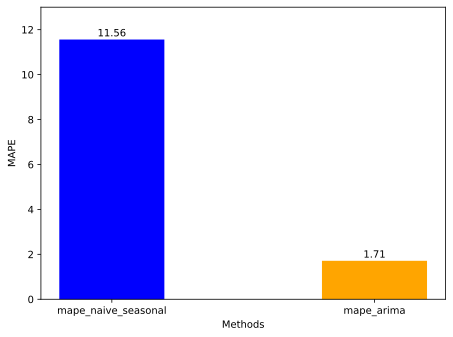

In [ ]:
## **Paso 19. Dibuje sus MSE en un gráfico de barras.**
import matplotlib.pyplot as plt

# Datos
x = ['mape_naive_seasonal', 'mape_arima']
y = [mape_naive_seasonal, mape_arima]

# Colores para las barras (puedes modificar esta lista según tus preferencias)
colors = ['blue',  'orange']

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar las barras con colores específicos
bars = ax.bar(x, y, width=0.4, color=colors)

# Etiquetas y límites del eje y
ax.set_xlabel('Methods')
ax.set_ylabel('MAPE')
ax.set_ylim(0, 13)

# Añadir texto con los valores encima de cada barra
for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.05,
             round(value, 2),
             ha='center', va='bottom')

# Ajustar el diseño y guardar la figura
plt.tight_layout()
plt.savefig('figures.png', dpi=300)
plt.show()


#### **Interpretacion del MAPE**
+ En la figura 7.9, puede ver que el MAPE para el pronóstico estacional ingenuo es del 11,56 %, mientras que el MAPE para el modelo ARIMA(3,2,3) es del 1.71%.
+ Esto significa que nuestras predicciones difieren en promedio un 1.71 % de los valores reales.
+ El modelo ARIMA(3,2,3) es claramente un modelo mejor que el método estacional ingenuo.

# **Resumen del capitulo 7**
+ El modelo de media móvil integrado autorregresivo, denotado como $ARIMA(p,d,q)$, es la combinación del modelo autorregresivo $AR( p )$ , el orden de integración $d$ y el modelo de media móvil $MA(q)$.
+ El modelo $ARIMA(p,d,q)$ se puede aplicar en series temporales no estacionarias y tiene la ventaja adicional de devolver pronósticos en la misma escala que la serie original.
+ El orden de integración $d$ es igual al número mínimo de veces que se debe diferenciar una serie para volverse estacionaria.
+ Un modelo $ARIMA(p,0,q)$ es equivalente a un modelo $ARMA(p,q)$ modelo.